In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [428]:
plt.style.use("ggplot")

In [701]:
query_string = """
select date, 
    fullVisitorId as user_id,
    visitId as session_id,
    case h.eCommerceAction.action_type 
        when '2' then 'product view'
        when '3' then 'add to cart'
        when '5' then 'purchase started'
        when '6' then 'purchase completed'
        end as action,
    p.v2ProductCategory as category,
    p.v2ProductName as name,
    p.productRevenue as item_revenue,
    h.transaction.transactionRevenue as total_revenue
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    LEFT JOIN UNNEST(hits) as h
    LEFT JOIN UNNEST(h.product) as p
where _TABLE_SUFFIX BETWEEN '20160801' AND '20170731' 
and h.eCommerceAction.action_type in ('2', '3', '5', '6')
order by date ;
"""

df = client.query(query_string).to_dataframe()
df.head()

,date,user_id,session_id,action,category,name,item_revenue,total_revenue
0,20160801,8295804655007281109,1470077612,product view,Home/Limited Supply/Bags/,Oasis Backpack,NaN,NaN
1,20160801,0831372147340640012,1470046098,product view,Home/Apparel/Men's/Men's-T-Shirts/,YouTube Men's Vintage Tee,NaN,NaN
2,20160801,0831372147340640012,1470046098,product view,Home/Apparel/Men's/Men's-T-Shirts/,YouTube Men's Short Sleeve Hero Tee Charcoal,NaN,NaN
3,20160801,8159312408158297118,1470108789,product view,${escCatTitle},Google Women's Weatherblock Shell Jacket Black,NaN,NaN
4,20160801,8159312408158297118,1470108789,product view,${escCatTitle},Google Women's Weatherblock Shell Jacket Black,NaN,NaN


In [702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804274 entries, 0 to 804273
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           804274 non-null  object 
 1   user_id        804274 non-null  object 
 2   session_id     804274 non-null  int64  
 3   action         804274 non-null  object 
 4   category       804251 non-null  object 
 5   name           804251 non-null  object 
 6   item_revenue   36632 non-null   float64
 7   total_revenue  36559 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 49.1+ MB


In [703]:
df.describe()

,session_id,item_revenue,total_revenue
count,804274.00000,36632.00000,36559.00000
mean,1484548672.55306,47312321.85636,287272594.16286
std,9666147.83139,159242354.11587,1030307521.19974
min,1470035161.00000,895263.00000,1200000.00000
25%,1475596717.00000,11690000.00000,46890000.00000
50%,1483560802.00000,19590000.00000,96580000.00000
75%,1493063887.00000,41590000.00000,230510000.00000
max,1501569698.00000,9496000000.00000,23952560000.00000


In [704]:
# 매출 금액 자리수 변경
df['item_revenue'] = df['item_revenue'] / (10 ** 6)
df['total_revenue'] = df['total_revenue'] / (10 ** 6)
df

,date,user_id,session_id,action,category,name,item_revenue,total_revenue
0,20160801,8295804655007281109,1470077612,product view,Home/Limited Supply/Bags/,Oasis Backpack,NaN,NaN
1,20160801,0831372147340640012,1470046098,product view,Home/Apparel/Men's/Men's-T-Shirts/,YouTube Men's Vintage Tee,NaN,NaN
2,20160801,0831372147340640012,1470046098,product view,Home/Apparel/Men's/Men's-T-Shirts/,YouTube Men's Short Sleeve Hero Tee Charcoal,NaN,NaN
3,20160801,8159312408158297118,1470108789,product view,${escCatTitle},Google Women's Weatherblock Shell Jacket Black,NaN,NaN
4,20160801,8159312408158297118,1470108789,product view,${escCatTitle},Google Women's Weatherblock Shell Jacket Black,NaN,NaN
...,...,...,...,...,...,...,...,...
804269,20170731,3556380371648369739,1501530296,add to cart,${escCatTitle},YouTube Custom Decals,NaN,NaN
804270,20170731,3556380371648369739,1501530296,purchase started,Office,YouTube Custom Decals,NaN,NaN
804271,20170731,4510124417472283674,1501500653,add to cart,${escCatTitle},YouTube Men's Fleece Hoodie Black,NaN,NaN
804272,20170731,4510124417472283674,1501500653,add to cart,${escCatTitle},Google Men's Short Sleeve Badge Tee Charcoal,NaN,NaN


In [705]:
# date열 날짜형식으로 변경
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,user_id,session_id,action,category,name,item_revenue,total_revenue
0,2016-08-01,8295804655007281109,1470077612,product view,Home/Limited Supply/Bags/,Oasis Backpack,NaN,NaN
1,2016-08-01,0831372147340640012,1470046098,product view,Home/Apparel/Men's/Men's-T-Shirts/,YouTube Men's Vintage Tee,NaN,NaN
2,2016-08-01,0831372147340640012,1470046098,product view,Home/Apparel/Men's/Men's-T-Shirts/,YouTube Men's Short Sleeve Hero Tee Charcoal,NaN,NaN
3,2016-08-01,8159312408158297118,1470108789,product view,${escCatTitle},Google Women's Weatherblock Shell Jacket Black,NaN,NaN
4,2016-08-01,8159312408158297118,1470108789,product view,${escCatTitle},Google Women's Weatherblock Shell Jacket Black,NaN,NaN


In [706]:
df.describe()

,session_id,item_revenue,total_revenue
count,804274.00000,36632.00000,36559.00000
mean,1484548672.55306,47.31232,287.27259
std,9666147.83139,159.24235,1030.30752
min,1470035161.00000,0.89526,1.20000
25%,1475596717.00000,11.69000,46.89000
50%,1483560802.00000,19.59000,96.58000
75%,1493063887.00000,41.59000,230.51000
max,1501569698.00000,9496.00000,23952.56000


In [745]:
df['item_revenue'].sum()

1733144.974242

In [746]:
df['purchase_month'] = df['date'].dt.strftime('%Y-%m')
df

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month
0,2016-08-01,8295804655007281109,1470077612,product view,Home/Limited Supply/Bags/,Oasis Backpack,NaN,NaN,2016-08
1,2016-08-01,0831372147340640012,1470046098,product view,Home/Apparel/Men's/Men's-T-Shirts/,YouTube Men's Vintage Tee,NaN,NaN,2016-08
2,2016-08-01,0831372147340640012,1470046098,product view,Home/Apparel/Men's/Men's-T-Shirts/,YouTube Men's Short Sleeve Hero Tee Charcoal,NaN,NaN,2016-08
3,2016-08-01,8159312408158297118,1470108789,product view,${escCatTitle},Google Women's Weatherblock Shell Jacket Black,NaN,NaN,2016-08
4,2016-08-01,8159312408158297118,1470108789,product view,${escCatTitle},Google Women's Weatherblock Shell Jacket Black,NaN,NaN,2016-08
...,...,...,...,...,...,...,...,...,...
804269,2017-07-31,3556380371648369739,1501530296,add to cart,${escCatTitle},YouTube Custom Decals,NaN,NaN,2017-07
804270,2017-07-31,3556380371648369739,1501530296,purchase started,Office,YouTube Custom Decals,NaN,NaN,2017-07
804271,2017-07-31,4510124417472283674,1501500653,add to cart,${escCatTitle},YouTube Men's Fleece Hoodie Black,NaN,NaN,2017-07
804272,2017-07-31,4510124417472283674,1501500653,add to cart,${escCatTitle},Google Men's Short Sleeve Badge Tee Charcoal,NaN,NaN,2017-07


In [747]:
df_item_revenue = df.groupby('purchase_month').sum().reset_index()
df_item_revenue

,purchase_month,session_id,item_revenue,total_revenue
0,2016-08,170728263616057,159212.40930,883993.91000
1,2016-09,116517301858004,128186.93950,900941.34000
2,2016-10,94826852473487,124707.77958,633785.98000
3,2016-11,90941970573591,133057.92958,761998.52000
4,2016-12,112994124101244,167566.04938,932785.19000
5,2017-01,74866432770791,106320.14971,609528.58000
6,2017-02,68163673995722,116298.33969,801834.72000
7,2017-03,93092157559922,149642.69954,765576.94000
8,2017-04,90366492742322,222894.97955,1713501.16000
9,2017-05,91806948591973,136231.99946,731199.25000


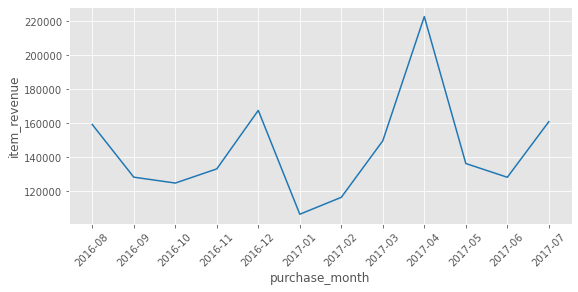

In [851]:
plt.figure(figsize = (9,4))
sns.lineplot(data = df_item_revenue, x = 'purchase_month', y = 'item_revenue', color = 'tab:blue')
plt.xticks(rotation = 45)
plt.show()

In [757]:
(222894.97955 - 106320.14971) / 106320.14971

1.0964509564552982

In [758]:
revenue_per_day = df.groupby('date')['item_revenue'].sum()
revenue_per_day = revenue_per_day.reset_index()
revenue_per_day

,date,item_revenue
0,2016-08-01,6288.05998
1,2016-08-02,1467.94998
2,2016-08-03,0.00000
3,2016-08-04,1274.89000
4,2016-08-05,5307.00998
...,...,...
360,2017-07-27,4686.65995
361,2017-07-28,5217.03996
362,2017-07-29,1132.00998
363,2017-07-30,2357.15998


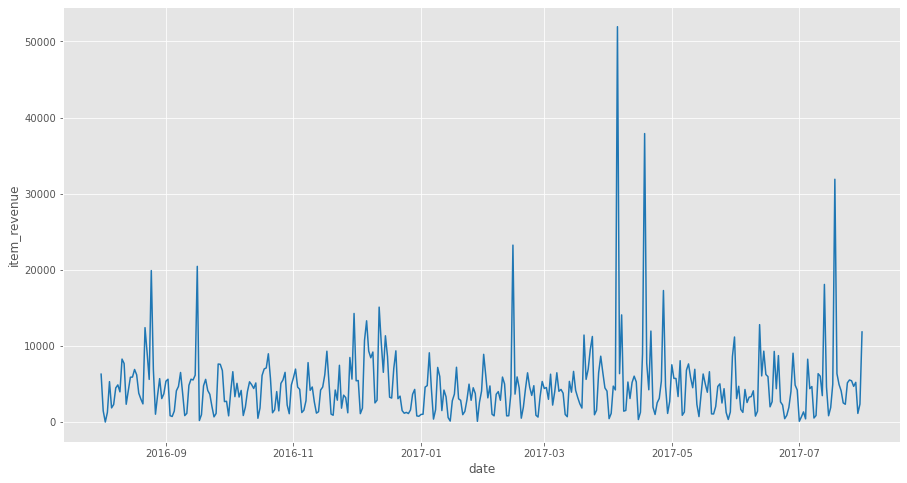

In [852]:
plt.figure(figsize = (15,8))
sns.lineplot(data = revenue_per_day, x = 'date', y = 'item_revenue', color = 'tab:blue')
plt.show()

In [710]:
revenue_per_day.sort_values(by = 'item_revenue', ascending = False).head()

,date,item_revenue
247,2017-04-05,51938.33998
260,2017-04-18,37898.05994
351,2017-07-18,31895.07997
197,2017-02-14,23242.36997
46,2016-09-16,20452.46996


## 코호트 분석을 위해 구매한 고객만 필터링

In [760]:
#구매 완료 건만 집계
df[df['action'] == 'purchase completed']

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month
7,2016-08-01,4993485206334150199,1470106850,purchase completed,(not set),YouTube Men's Short Sleeve Hero Tee White,23.99000,23.99000,2016-08
8,2016-08-01,4993485206334150199,1470106850,purchase completed,(not set),YouTube Men's Short Sleeve Hero Tee White,NaN,NaN,2016-08
151,2016-08-01,3907770685196037697,1470084579,purchase completed,(not set),24 oz YouTube Sergeant Stripe Bottle,12.99000,12.99000,2016-08
152,2016-08-01,3907770685196037697,1470084579,purchase completed,(not set),24 oz YouTube Sergeant Stripe Bottle,NaN,NaN,2016-08
336,2016-08-01,7056870819058799369,1470069291,purchase completed,(not set),Google Men's 100% Cotton Short Sleeve Hero Tee...,22.59000,22.59000,2016-08
...,...,...,...,...,...,...,...,...,...
804245,2017-07-31,7483600664917507409,1501537217,purchase completed,Drinkware,Google 25 oz Red Stainless Steel Bottle,NaN,NaN,2017-07
804246,2017-07-31,7483600664917507409,1501537217,purchase completed,Drinkware,Android 17oz Stainless Steel Sport Bottle,NaN,NaN,2017-07
804247,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Android Men's Short Sleeve Hero Tee White,NaN,NaN,2017-07
804248,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Android Men's Take Charge Short Sleeve Tee Purple,NaN,NaN,2017-07


In [761]:
# 구매완료가 중복으로 집계되어, 금액이 없는 건은 삭제
purchase_completed = df[df['action'] == 'purchase completed']
purchase_completed.isna().sum()

date                  0
user_id               0
session_id            0
action                0
category              1
name                  1
item_revenue      37430
total_revenue     37503
purchase_month        0
dtype: int64

In [762]:
purchase_completed = purchase_completed.dropna()
purchase_completed

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month
7,2016-08-01,4993485206334150199,1470106850,purchase completed,(not set),YouTube Men's Short Sleeve Hero Tee White,23.99000,23.99000,2016-08
151,2016-08-01,3907770685196037697,1470084579,purchase completed,(not set),24 oz YouTube Sergeant Stripe Bottle,12.99000,12.99000,2016-08
336,2016-08-01,7056870819058799369,1470069291,purchase completed,(not set),Google Men's 100% Cotton Short Sleeve Hero Tee...,22.59000,22.59000,2016-08
375,2016-08-01,6030957980134486247,1470096817,purchase completed,(not set),Women's YouTube Short Sleeve Hero Tee Black,19.99000,19.99000,2016-08
529,2016-08-01,6203401114057579951,1470055898,purchase completed,(not set),22 oz Mini Mountain Bottle,36.35000,72.70000,2016-08
...,...,...,...,...,...,...,...,...,...
804228,2017-07-31,7483600664917507409,1501537217,purchase completed,Drinkware,Google 25 oz Red Stainless Steel Bottle,22.61529,260.46000,2017-07
804229,2017-07-31,7483600664917507409,1501537217,purchase completed,Drinkware,Android 17oz Stainless Steel Sport Bottle,21.49529,260.46000,2017-07
804230,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Android Men's Short Sleeve Hero Tee White,7.03529,260.46000,2017-07
804231,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Android Men's Take Charge Short Sleeve Tee Purple,8.23529,260.46000,2017-07


In [763]:
purchase_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36558 entries, 7 to 804232
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            36558 non-null  datetime64[ns]
 1   user_id         36558 non-null  object        
 2   session_id      36558 non-null  int64         
 3   action          36558 non-null  object        
 4   category        36558 non-null  object        
 5   name            36558 non-null  object        
 6   item_revenue    36558 non-null  float64       
 7   total_revenue   36558 non-null  float64       
 8   purchase_month  36558 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.8+ MB


In [764]:
purchase_completed.describe()

,session_id,item_revenue,total_revenue
count,36558.00000,36558.00000,36558.00000
mean,1485642258.81703,47.37645,287.25162
std,9492582.95531,159.39530,1030.31381
min,1470046365.00000,0.89526,1.20000
25%,1477448132.50000,11.72333,46.89000
50%,1485331278.00000,19.59000,96.58000
75%,1493943936.50000,41.59000,230.51000
max,1501566744.00000,9496.00000,23952.56000


In [765]:
#구매 1회(장바구니 1회) 당 결제 금액을 알기 위해 필터링
revenue_per_cart = purchase_completed.drop_duplicates(['user_id', 'session_id', 'total_revenue'])
revenue_per_cart

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month
7,2016-08-01,4993485206334150199,1470106850,purchase completed,(not set),YouTube Men's Short Sleeve Hero Tee White,23.99000,23.99000,2016-08
151,2016-08-01,3907770685196037697,1470084579,purchase completed,(not set),24 oz YouTube Sergeant Stripe Bottle,12.99000,12.99000,2016-08
336,2016-08-01,7056870819058799369,1470069291,purchase completed,(not set),Google Men's 100% Cotton Short Sleeve Hero Tee...,22.59000,22.59000,2016-08
375,2016-08-01,6030957980134486247,1470096817,purchase completed,(not set),Women's YouTube Short Sleeve Hero Tee Black,19.99000,19.99000,2016-08
529,2016-08-01,6203401114057579951,1470055898,purchase completed,(not set),22 oz Mini Mountain Bottle,36.35000,72.70000,2016-08
...,...,...,...,...,...,...,...,...,...
803813,2017-07-31,5139927098906360724,1501514209,purchase completed,Apparel,Google Men's Airflow 1/4 Zip Pullover Black,28.71429,196.81000,2017-07
803846,2017-07-31,7979010430069561046,1501522116,purchase completed,Electronics,Recycled Mouse Pad,6.00000,14.49000,2017-07
803897,2017-07-31,7463172420271311409,1501534049,purchase completed,Bags,Google Canvas Tote Natural/Navy,128.06286,996.68000,2017-07
804017,2017-07-31,2766162501835274072,1501533968,purchase completed,Apparel,Google Women's Convertible Vest-Jacket Black,25.76000,104.95000,2017-07


In [766]:
revenue_per_cart.describe()

,session_id,item_revenue,total_revenue
count,11909.00000,11909.00000,11909.00000
mean,1485749446.99034,59.31157,148.20461
std,9286540.55311,184.74703,552.40648
min,1470046365.00000,1.31111,1.20000
25%,1477930772.00000,15.82636,29.98000
50%,1485467658.00000,23.99000,55.97000
75%,1493844089.00000,51.73000,115.52000
max,1501566744.00000,7496.00000,23952.56000


- 전체 구매 고객
1. 1회 구매 금액(total_revenue)
    - 최소 1.2 달러, 최대 23952.56 달러
    - 구매한 유저의 75%는 약 116달러 이하로 구매
    - 1인 1회구매 금액 평균 약 148달러

In [767]:
purchase_completed_user = revenue_per_cart.groupby('user_id')['total_revenue'].count().reset_index()
purchase_completed_user

,user_id,total_revenue
0,0000213131142648941,1
1,0002871498069867123,1
2,0003450834640354121,1
3,0003961110741104601,1
4,000435324061339869,1
...,...,...
9956,9991633376050115277,1
9957,9994767073213036303,1
9958,9997409246962677759,1
9959,9998597322098588317,1


In [768]:
purchase_completed_user.describe()

,total_revenue
count,9961.00000
mean,1.19556
std,0.89471
min,1.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,35.00000


- 최소 1회, 최대 35회 구매
- 평균 약 1.19회 구매
- 구매자의 75%는 1회 이하 구매

# 코호트 분석

In [769]:
import datetime

1. 각 고객별 '최초 구매 월' 추출

In [770]:
month_group = purchase_completed.groupby('user_id')['purchase_month']
purchase_completed['start_month'] = month_group.transform(np.min)
purchase_completed.tail()

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month
804228,2017-07-31,7483600664917507409,1501537217,purchase completed,Drinkware,Google 25 oz Red Stainless Steel Bottle,22.61529,260.46000,2017-07,2017-07
804229,2017-07-31,7483600664917507409,1501537217,purchase completed,Drinkware,Android 17oz Stainless Steel Sport Bottle,21.49529,260.46000,2017-07,2017-07
804230,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Android Men's Short Sleeve Hero Tee White,7.03529,260.46000,2017-07,2017-07
804231,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Android Men's Take Charge Short Sleeve Tee Purple,8.23529,260.46000,2017-07,2017-07
804232,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Google Women's Scoop Neck Tee White,5.03529,260.46000,2017-07,2017-07


In [771]:
purchase_completed['purchase_month'] = pd.to_datetime(purchase_completed['purchase_month'])
purchase_completed['start_month'] = pd.to_datetime(purchase_completed['start_month'])
purchase_completed.tail()

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month
804228,2017-07-31,7483600664917507409,1501537217,purchase completed,Drinkware,Google 25 oz Red Stainless Steel Bottle,22.61529,260.46000,2017-07-01,2017-07-01
804229,2017-07-31,7483600664917507409,1501537217,purchase completed,Drinkware,Android 17oz Stainless Steel Sport Bottle,21.49529,260.46000,2017-07-01,2017-07-01
804230,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Android Men's Short Sleeve Hero Tee White,7.03529,260.46000,2017-07-01,2017-07-01
804231,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Android Men's Take Charge Short Sleeve Tee Purple,8.23529,260.46000,2017-07-01,2017-07-01
804232,2017-07-31,7483600664917507409,1501537217,purchase completed,Apparel,Google Women's Scoop Neck Tee White,5.03529,260.46000,2017-07-01,2017-07-01


2. 결제건 '월' - '최초 구매 월' = 차이

In [772]:
purchase_completed['passed_month'] = (purchase_completed['purchase_month'].dt.year - purchase_completed['start_month'].dt.year) * 12 + (purchase_completed['purchase_month'].dt.month - purchase_completed['start_month'].dt.month)
purchase_completed.head()

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
7,2016-08-01,4993485206334150199,1470106850,purchase completed,(not set),YouTube Men's Short Sleeve Hero Tee White,23.99000,23.99000,2016-08-01,2016-08-01,0
151,2016-08-01,3907770685196037697,1470084579,purchase completed,(not set),24 oz YouTube Sergeant Stripe Bottle,12.99000,12.99000,2016-08-01,2016-08-01,0
336,2016-08-01,7056870819058799369,1470069291,purchase completed,(not set),Google Men's 100% Cotton Short Sleeve Hero Tee...,22.59000,22.59000,2016-08-01,2016-08-01,0
375,2016-08-01,6030957980134486247,1470096817,purchase completed,(not set),Women's YouTube Short Sleeve Hero Tee Black,19.99000,19.99000,2016-08-01,2016-08-01,0
529,2016-08-01,6203401114057579951,1470055898,purchase completed,(not set),22 oz Mini Mountain Bottle,36.35000,72.70000,2016-08-01,2016-08-01,0


3. 최초 구매 월 / 차이 기준 고객 수 세기

In [773]:
cohort_group = purchase_completed.groupby(['start_month', 'passed_month'])
cohort_df = cohort_group['user_id'].nunique()
cohort_df

start_month  passed_month
2016-08-01   0               1025
             1                 45
             2                 20
             3                 12
             4                 11
                             ... 
2017-05-01   1                 26
             2                 16
2017-06-01   0                813
             1                 37
2017-07-01   0                890
Name: user_id, Length: 72, dtype: int64

In [774]:
cohort_df = cohort_df.reset_index()
cohort_df

,start_month,passed_month,user_id
0,2016-08-01,0,1025
1,2016-08-01,1,45
2,2016-08-01,2,20
3,2016-08-01,3,12
4,2016-08-01,4,11
...,...,...,...
67,2017-05-01,1,26
68,2017-05-01,2,16
69,2017-06-01,0,813
70,2017-06-01,1,37


4. index = 최초 구매 월, column = 차이 피봇

In [775]:
cohort_pivot = cohort_df.pivot(index = 'start_month', columns = 'passed_month')
cohort_pivot

user_id                                                        \
passed_month         0        1        2        3        4        5        6    
start_month                                                                     
2016-08-01   1025.00000 45.00000 20.00000 12.00000 11.00000  5.00000  3.00000   
2016-09-01    742.00000 29.00000  8.00000  6.00000  2.00000      NaN  2.00000   
2016-10-01    769.00000 40.00000 27.00000 17.00000 16.00000 14.00000 11.00000   
2016-11-01    804.00000 41.00000 25.00000  8.00000 13.00000  8.00000  8.00000   
2016-12-01   1233.00000 22.00000 16.00000 15.00000  1.00000  5.00000  2.00000   
2017-01-01    591.00000 17.00000 10.00000  2.00000  4.00000  2.00000      NaN   
2017-02-01    606.00000 26.00000 17.00000 12.00000  4.00000  6.00000      NaN   
2017-03-01    725.00000 33.00000  9.00000 12.00000  3.00000      NaN      NaN   
2017-04-01    796.00000 40.00000 11.00000  3.00000      NaN      NaN      NaN   
2017-05-01    967.00000 26.00000 16.00000      NaN      NaN      NaN      NaN   
2017-06-01    813.00000 37.00000      NaN      NaN      NaN      NaN      NaN   
2017-07-01    890.00000      NaN      NaN      NaN      NaN      NaN      NaN   

                                              
passed_month      7       8       9       10  
start_month                                   
2016-08-01   3.00000     NaN 2.00000 1.00000  
2016-09-01   2.00000     NaN 1.00000     NaN  
2016-10-01   8.00000 4.00000 2.00000     NaN  
2016-11-01   2.00000 4.00000     NaN     NaN  
2016-12-01   3.00000     NaN     NaN     NaN  
2017-01-01       NaN     NaN     NaN     NaN  
2017-02-01       NaN     NaN     NaN     NaN  
2017-03-01       NaN     NaN     NaN     NaN  
2017-04-01       NaN     NaN     NaN     NaN  
2017-05-01       NaN     NaN     NaN     NaN  
2017-06-01       NaN     NaN     NaN     NaN  
2017-07-01       NaN     NaN     NaN     NaN

In [732]:
# 주문 없는 달 확인

user_pass_8 = purchase_completed[purchase_completed['passed_month'] == 8]
user_pass_8 = user_pass_8[user_pass_8['start_month'] == '2016-08-01']
user_pass_8

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month


In [733]:
user_pass_5 = purchase_completed[purchase_completed['passed_month'] == 5]
user_pass_5 = user_pass_8[user_pass_8['start_month'] == '2016-09-01']
user_pass_5

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month


6. 퍼센트로 변환, 시각화

In [776]:
cohort_pivot.iloc[:, 0]

start_month
2016-08-01   1025.00000
2016-09-01    742.00000
2016-10-01    769.00000
2016-11-01    804.00000
2016-12-01   1233.00000
2017-01-01    591.00000
2017-02-01    606.00000
2017-03-01    725.00000
2017-04-01    796.00000
2017-05-01    967.00000
2017-06-01    813.00000
2017-07-01    890.00000
Name: (user_id, 0), dtype: float64

In [777]:
cohort_percent = round(cohort_pivot.div(cohort_pivot.iloc[:, 0], axis = 0) * 100, 2)
cohort_percent

user_id                                                  \
passed_month        0       1       2       3       4       5       6    
start_month                                                              
2016-08-01   100.00000 4.39000 1.95000 1.17000 1.07000 0.49000 0.29000   
2016-09-01   100.00000 3.91000 1.08000 0.81000 0.27000     NaN 0.27000   
2016-10-01   100.00000 5.20000 3.51000 2.21000 2.08000 1.82000 1.43000   
2016-11-01   100.00000 5.10000 3.11000 1.00000 1.62000 1.00000 1.00000   
2016-12-01   100.00000 1.78000 1.30000 1.22000 0.08000 0.41000 0.16000   
2017-01-01   100.00000 2.88000 1.69000 0.34000 0.68000 0.34000     NaN   
2017-02-01   100.00000 4.29000 2.81000 1.98000 0.66000 0.99000     NaN   
2017-03-01   100.00000 4.55000 1.24000 1.66000 0.41000     NaN     NaN   
2017-04-01   100.00000 5.03000 1.38000 0.38000     NaN     NaN     NaN   
2017-05-01   100.00000 2.69000 1.65000     NaN     NaN     NaN     NaN   
2017-06-01   100.00000 4.55000     NaN     NaN     NaN     NaN     NaN   
2017-07-01   100.00000     NaN     NaN     NaN     NaN     NaN     NaN   

                                              
passed_month      7       8       9       10  
start_month                                   
2016-08-01   0.29000     NaN 0.20000 0.10000  
2016-09-01   0.27000     NaN 0.13000     NaN  
2016-10-01   1.04000 0.52000 0.26000     NaN  
2016-11-01   0.25000 0.50000     NaN     NaN  
2016-12-01   0.24000     NaN     NaN     NaN  
2017-01-01       NaN     NaN     NaN     NaN  
2017-02-01       NaN     NaN     NaN     NaN  
2017-03-01       NaN     NaN     NaN     NaN  
2017-04-01       NaN     NaN     NaN     NaN  
2017-05-01       NaN     NaN     NaN     NaN  
2017-06-01       NaN     NaN     NaN     NaN  
2017-07-01       NaN     NaN     NaN     NaN

In [736]:
cohort_percent.mean()

         passed_month
user_id  0              100.00000
         1                4.03364
         2                1.97200
         3                1.19667
         4                0.85875
         5                0.84167
         6                0.63000
         7                0.41800
         8                0.51000
         9                0.19667
         10               0.10000
dtype: float64

<AxesSubplot:xlabel='None-passed_month', ylabel='start_month'>

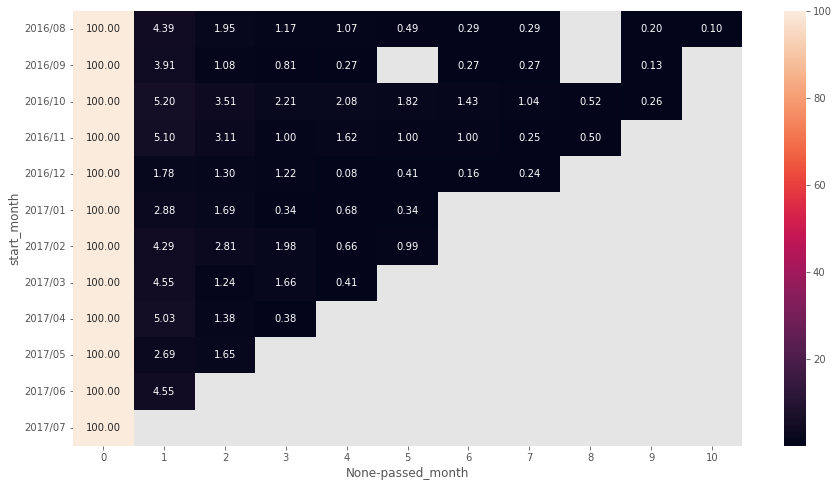

In [778]:
xticks = np.arange(0, 11)
yticks = ['2016/08', '2016/09', '2016/10', '2016/11', '2016/12', '2017/01', '2017/02', '2017/03', '2017/04', '2017/05', '2017/06', '2017/07']

plt.figure(figsize = (15, 8))
sns.heatmap(cohort_percent, 
            annot=True, 
            xticklabels=xticks,
            yticklabels=yticks, 
            fmt='.2f')

# 첫 구매달과 첫 구매달+1 분석

### 첫 구매 달

In [779]:
month_0 = purchase_completed[purchase_completed['passed_month'] == 0]
month_0

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
7,2016-08-01,4993485206334150199,1470106850,purchase completed,(not set),YouTube Men's Short Sleeve Hero Tee White,23.99000,23.99000,2016-08-01,2016-08-01,0
2120,2016-08-01,2788555723243018631,1470077433,purchase completed,(not set),Gift Card - $25.00,25.80000,258.00000,2016-08-01,2016-08-01,0
2119,2016-08-01,2788555723243018631,1470077433,purchase completed,(not set),Gift Card - $25.00,25.80000,258.00000,2016-08-01,2016-08-01,0
2118,2016-08-01,2788555723243018631,1470077433,purchase completed,(not set),Gift Card - $25.00,25.80000,258.00000,2016-08-01,2016-08-01,0
2117,2016-08-01,2788555723243018631,1470077433,purchase completed,(not set),Gift Card - $25.00,25.80000,258.00000,2016-08-01,2016-08-01,0
...,...,...,...,...,...,...,...,...,...,...,...
802273,2017-07-31,9598871851189945502,1501518841,purchase completed,Notebooks & Journals,Google Leather Perforated Journal,76.60000,155.93000,2017-07-01,2017-07-01,0
802274,2017-07-31,9598871851189945502,1501518841,purchase completed,Drinkware,Google 25 oz Red Stainless Steel Bottle,79.33000,155.93000,2017-07-01,2017-07-01,0
802322,2017-07-31,7284107994229493297,1501545464,purchase completed,Drinkware,Google 22 oz Water Bottle,4.49000,11.99000,2017-07-01,2017-07-01,0
802155,2017-07-31,1190814633327628141,1501542332,purchase completed,Apparel,YouTube Women's Short Sleeve Hero Tee Charcoal,15.52333,48.40000,2017-07-01,2017-07-01,0


In [780]:
# 카테고리 확인

month_0['category'].value_counts()

Apparel                               11514
(not set)                              7711
Office                                 4572
Drinkware                              2498
Lifestyle                              1835
Bags                                   1215
Electronics                             941
Headgear                                507
Notebooks & Journals                    307
Waze                                    255
${productitem.product.origCatName}      227
Bottles                                 177
Gift Cards                              151
Accessories                             128
Google                                   82
Backpacks                                78
Housewares                               76
More Bags                                65
Fun                                      61
Android                                  28
Tumblers                                  4
Name: category, dtype: int64

In [781]:
# 카테고리 not set과 알 수 없는 것은 삭제하고 본다.

month_0_cate = month_0.loc[month_0['category'] != '(not set)']
month_0_cate = month_0_cate.loc[month_0['category'] != '${productitem.product.origCatName}']
month_0_cate

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
223351,2016-10-13,2175021516855866092,1476415492,purchase completed,Office,Ballpoint Pen Blue,31.95000,197.75000,2016-10-01,2016-10-01,0
223352,2016-10-13,2175021516855866092,1476415492,purchase completed,Lifestyle,1 oz Hand Sanitizer,61.95000,197.75000,2016-10-01,2016-10-01,0
223353,2016-10-13,2175021516855866092,1476415492,purchase completed,Office,Galaxy Screen Cleaning Cloth,71.90000,197.75000,2016-10-01,2016-10-01,0
223410,2016-10-13,7463172420271311409,1476394879,purchase completed,Lifestyle,Windup Android,32.19273,582.41000,2016-10-01,2016-10-01,0
223408,2016-10-13,7463172420271311409,1476394879,purchase completed,Drinkware,26 oz Double Wall Insulated Bottle,50.25273,582.41000,2016-10-01,2016-10-01,0
...,...,...,...,...,...,...,...,...,...,...,...
802273,2017-07-31,9598871851189945502,1501518841,purchase completed,Notebooks & Journals,Google Leather Perforated Journal,76.60000,155.93000,2017-07-01,2017-07-01,0
802274,2017-07-31,9598871851189945502,1501518841,purchase completed,Drinkware,Google 25 oz Red Stainless Steel Bottle,79.33000,155.93000,2017-07-01,2017-07-01,0
802322,2017-07-31,7284107994229493297,1501545464,purchase completed,Drinkware,Google 22 oz Water Bottle,4.49000,11.99000,2017-07-01,2017-07-01,0
802155,2017-07-31,1190814633327628141,1501542332,purchase completed,Apparel,YouTube Women's Short Sleeve Hero Tee Charcoal,15.52333,48.40000,2017-07-01,2017-07-01,0


In [782]:
month_0_cate['category'].value_counts()

Apparel                 11514
Office                   4572
Drinkware                2498
Lifestyle                1835
Bags                     1215
Electronics               941
Headgear                  507
Notebooks & Journals      307
Waze                      255
Bottles                   177
Gift Cards                151
Accessories               128
Google                     82
Backpacks                  78
Housewares                 76
More Bags                  65
Fun                        61
Android                    28
Tumblers                    4
Name: category, dtype: int64

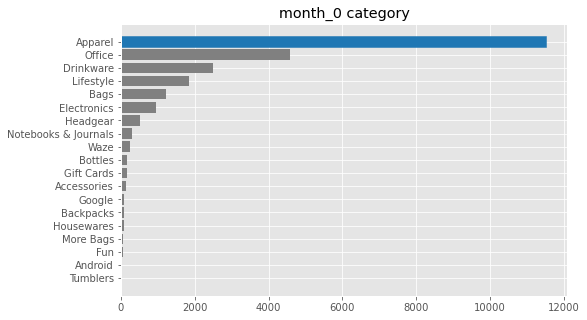

In [783]:
plt.figure(figsize = (8,5))

g01 = plt.barh(data = month_0_cate['category'].value_counts().reset_index().sort_values(by = ['category'], ascending = True), y = 'index', width = 'category', color = 'grey')
g01[18].set_color('tab:blue')
plt.title('month_0 category')
plt.show()

1. 구매 가장 많은 카테고리: Apparel
2. 상위 5개 카테고리: Apparel, Office, Drinkware, Lifestyle, Bags

### revenue 중복 제거하고 구매 금액 계산하기

카테고리가 not set, 이상한 이름이었던 상품도 포함하여 분석

In [785]:
month_0_revenue = month_0.drop_duplicates(['user_id', 'session_id', 'total_revenue'])

month_0_revenue

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
7,2016-08-01,4993485206334150199,1470106850,purchase completed,(not set),YouTube Men's Short Sleeve Hero Tee White,23.99000,23.99000,2016-08-01,2016-08-01,0
2120,2016-08-01,2788555723243018631,1470077433,purchase completed,(not set),Gift Card - $25.00,25.80000,258.00000,2016-08-01,2016-08-01,0
1921,2016-08-01,4166700707688517424,1470046365,purchase completed,(not set),UFO Bluetooth Water Resistant Speaker,1050.45000,1592.40000,2016-08-01,2016-08-01,0
2196,2016-08-01,8879965876172125518,1470119214,purchase completed,(not set),Google Men's Vintage Badge Tee Green,16.59000,33.18000,2016-08-01,2016-08-01,0
1798,2016-08-01,2509714289037323244,1470078181,purchase completed,(not set),24 oz USA Made Aluminum Bottle,81.15000,149.19000,2016-08-01,2016-08-01,0
...,...,...,...,...,...,...,...,...,...,...,...
802153,2017-07-31,1190814633327628141,1501542332,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,13.92333,48.40000,2017-07-01,2017-07-01,0
802180,2017-07-31,4218367025544931420,1501526066,purchase completed,Bags,Suitcase Organizer Cubes,618.50000,618.50000,2017-07-01,2017-07-01,0
802199,2017-07-31,4952396078130707023,1501554975,purchase completed,Office,Google Laptop and Cell Phone Stickers,7.99000,7.99000,2017-07-01,2017-07-01,0
802255,2017-07-31,9598871851189945502,1501518841,purchase completed,Notebooks & Journals,Google Leather Perforated Journal,55.00000,111.95000,2017-07-01,2017-07-01,0


In [786]:
month_0_revenue.describe()

,session_id,item_revenue,total_revenue,passed_month
count,10910.00000,10910.00000,10910.00000,10910.00000
mean,1485546767.35087,51.91322,128.26373,0.00000
std,9371638.22686,158.75993,403.40303,0.00000
min,1470046365.00000,1.40000,1.20000,0.00000
25%,1477502404.50000,14.86893,29.15750,0.00000
50%,1485026622.00000,22.47684,53.39000,0.00000
75%,1493834957.00000,46.07262,108.94750,0.00000
max,1501566744.00000,7003.50000,17859.50000,0.00000


1. 1회 구매 금액(total_revenue)
    - 최소 1.2달러, 최대 17859.5달러 구매
    - 구매한 user의 75%는 약 109달러 이하로 구매
    - 1인 1회 구매 금액 평균 약 128달러

In [787]:
month_0_revenue['purchase_month'] = month_0_revenue['purchase_month'].dt.strftime('%Y-%m')
month_0_revenue

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_734/2952598005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_0_revenue['purchase_month'] = month_0_revenue['purchase_month'].dt.strftime('%Y-%m')


,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
7,2016-08-01,4993485206334150199,1470106850,purchase completed,(not set),YouTube Men's Short Sleeve Hero Tee White,23.99000,23.99000,2016-08,2016-08-01,0
2120,2016-08-01,2788555723243018631,1470077433,purchase completed,(not set),Gift Card - $25.00,25.80000,258.00000,2016-08,2016-08-01,0
1921,2016-08-01,4166700707688517424,1470046365,purchase completed,(not set),UFO Bluetooth Water Resistant Speaker,1050.45000,1592.40000,2016-08,2016-08-01,0
2196,2016-08-01,8879965876172125518,1470119214,purchase completed,(not set),Google Men's Vintage Badge Tee Green,16.59000,33.18000,2016-08,2016-08-01,0
1798,2016-08-01,2509714289037323244,1470078181,purchase completed,(not set),24 oz USA Made Aluminum Bottle,81.15000,149.19000,2016-08,2016-08-01,0
...,...,...,...,...,...,...,...,...,...,...,...
802153,2017-07-31,1190814633327628141,1501542332,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,13.92333,48.40000,2017-07,2017-07-01,0
802180,2017-07-31,4218367025544931420,1501526066,purchase completed,Bags,Suitcase Organizer Cubes,618.50000,618.50000,2017-07,2017-07-01,0
802199,2017-07-31,4952396078130707023,1501554975,purchase completed,Office,Google Laptop and Cell Phone Stickers,7.99000,7.99000,2017-07,2017-07-01,0
802255,2017-07-31,9598871851189945502,1501518841,purchase completed,Notebooks & Journals,Google Leather Perforated Journal,55.00000,111.95000,2017-07,2017-07-01,0


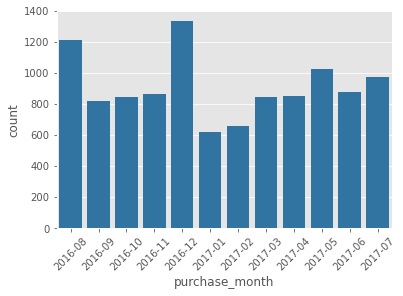

In [858]:
sns.countplot(data = month_0_revenue, x = 'purchase_month', color = 'tab:blue')
plt.xticks(rotation = 45)
plt.show()

- 16년 12월 구매 가장 많음
- 17년 1월 구매 가장 적음

In [790]:
print('총 구매 금액: $', round(sum(month_0_revenue['total_revenue']), 2))

총 구매 금액: $ 1399357.28


In [791]:
# 1인 평균 구매 횟수. 이미 구매 완료된 집합이기 때문에 그룹바이하고 횟수 세준다
month_0_user = month_0_revenue.groupby('user_id')['total_revenue'].count().reset_index()
month_0_user

,user_id,total_revenue
0,0000213131142648941,1
1,0002871498069867123,1
2,0003450834640354121,1
3,0003961110741104601,1
4,000435324061339869,1
...,...,...
9956,9991633376050115277,1
9957,9994767073213036303,1
9958,9997409246962677759,1
9959,9998597322098588317,1


In [792]:
month_0_user.describe()

,total_revenue
count,9961.00000
mean,1.09527
std,0.50525
min,1.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,17.00000


- 최소 1회, 최대 17회 구매
- 평균 약 1.1회 구매
- 구매자의 75%는 1회 이하 구매

### 첫 구매 달 +1

In [793]:
month_1 = purchase_completed[purchase_completed['passed_month'] == 1]

month_1

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
116360,2016-09-01,9807072102349488174,1472736449,purchase completed,(not set),Google Sunglasses,51.00000,75.51000,2016-09-01,2016-08-01,1
116561,2016-09-01,7970701992007145468,1472762545,purchase completed,(not set),Google Womens 3/4 Sleeve Baseball Raglan Heath...,20.99000,29.24000,2016-09-01,2016-08-01,1
117508,2016-09-01,4297151124311422842,1472752979,purchase completed,(not set),22 oz Android Bottle,31.23333,210.08000,2016-09-01,2016-08-01,1
117509,2016-09-01,4297151124311422842,1472752979,purchase completed,(not set),Red Shine 15 oz Mug,40.30333,210.08000,2016-09-01,2016-08-01,1
117510,2016-09-01,4297151124311422842,1472752979,purchase completed,(not set),Google Sunglasses,29.33333,210.08000,2016-09-01,2016-08-01,1
...,...,...,...,...,...,...,...,...,...,...,...
803073,2017-07-31,9227772112500941696,1501561533,purchase completed,Lifestyle,Google Sunglasses,35.57143,633.82000,2017-07-01,2017-06-01,1
803074,2017-07-31,9227772112500941696,1501561533,purchase completed,Bags,Waterproof Backpack,200.55143,633.82000,2017-07-01,2017-06-01,1
803075,2017-07-31,9227772112500941696,1501561533,purchase completed,Bags,Google Laptop Backpack,100.56143,633.82000,2017-07-01,2017-06-01,1
803076,2017-07-31,9227772112500941696,1501561533,purchase completed,Drinkware,Red Shine 15 oz Mug,130.47143,633.82000,2017-07-01,2017-06-01,1


In [794]:
# 카테고리 확인

month_1['category'].value_counts()

Apparel                               436
Office                                316
(not set)                             286
Lifestyle                             153
Drinkware                             119
Bags                                   87
Electronics                            64
${productitem.product.origCatName}     26
Headgear                               18
Notebooks & Journals                   11
Google                                  7
Bottles                                 7
Housewares                              5
Backpacks                               4
More Bags                               4
Accessories                             3
Waze                                    3
Gift Cards                              2
Fun                                     2
Tumblers                                1
Name: category, dtype: int64

In [795]:
# 카테고리 not set과 알 수 없는 것은 삭제하고 본다.

month_1_cate = month_1.loc[month_1['category'] != '(not set)']
month_1_cate = month_1_cate.loc[month_1['category'] != '${productitem.product.origCatName}']
month_1_cate

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
222517,2016-10-13,7801380304889274913,1476378134,purchase completed,Office,Android Sticker Sheet Ultra Removable,3.39000,10.77000,2016-10-01,2016-09-01,1
223253,2016-10-13,9340120327183935722,1476401078,purchase completed,Office,Switch Tone Color Crayon Pen,25.35000,381.72000,2016-10-01,2016-09-01,1
223254,2016-10-13,9340120327183935722,1476401078,purchase completed,Lifestyle,1 oz Hand Sanitizer,25.35000,381.72000,2016-10-01,2016-09-01,1
223255,2016-10-13,9340120327183935722,1476401078,purchase completed,Office,Google Doodle Decal,43.50000,381.72000,2016-10-01,2016-09-01,1
223256,2016-10-13,9340120327183935722,1476401078,purchase completed,Electronics,Google Water Resistant Bluetooth Speaker,85.47000,381.72000,2016-10-01,2016-09-01,1
...,...,...,...,...,...,...,...,...,...,...,...
803073,2017-07-31,9227772112500941696,1501561533,purchase completed,Lifestyle,Google Sunglasses,35.57143,633.82000,2017-07-01,2017-06-01,1
803074,2017-07-31,9227772112500941696,1501561533,purchase completed,Bags,Waterproof Backpack,200.55143,633.82000,2017-07-01,2017-06-01,1
803075,2017-07-31,9227772112500941696,1501561533,purchase completed,Bags,Google Laptop Backpack,100.56143,633.82000,2017-07-01,2017-06-01,1
803076,2017-07-31,9227772112500941696,1501561533,purchase completed,Drinkware,Red Shine 15 oz Mug,130.47143,633.82000,2017-07-01,2017-06-01,1


In [796]:
month_1_cate['category'].value_counts()

Apparel                 436
Office                  316
Lifestyle               153
Drinkware               119
Bags                     87
Electronics              64
Headgear                 18
Notebooks & Journals     11
Google                    7
Bottles                   7
Housewares                5
More Bags                 4
Backpacks                 4
Accessories               3
Waze                      3
Fun                       2
Gift Cards                2
Tumblers                  1
Name: category, dtype: int64

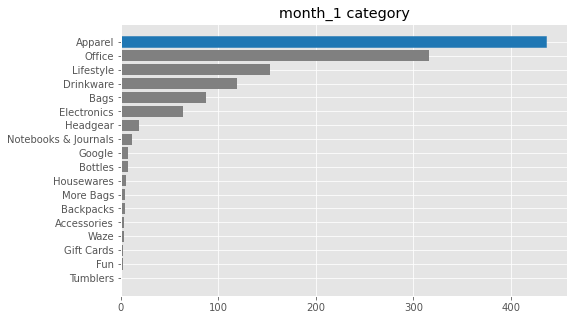

In [797]:
plt.figure(figsize = (8,5))

g01 = plt.barh(data = month_1_cate['category'].value_counts().reset_index().sort_values(by = ['category'], ascending = True), y = 'index', width = 'category', color = 'grey')
g01[17].set_color('tab:blue')
plt.title('month_1 category')
plt.show()

1. 구매 가장 많은 카테고리: Apparel
2. 상위 5개 카테고리: Apparel, Office, Lifestyle, Drinkware, Bags

### revenue 중복 제거하고 구매 금액 계산하기

In [798]:
month_1_revenue = month_1.drop_duplicates(['user_id', 'session_id', 'total_revenue'])

month_1_revenue

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
116360,2016-09-01,9807072102349488174,1472736449,purchase completed,(not set),Google Sunglasses,51.00000,75.51000,2016-09-01,2016-08-01,1
116561,2016-09-01,7970701992007145468,1472762545,purchase completed,(not set),Google Womens 3/4 Sleeve Baseball Raglan Heath...,20.99000,29.24000,2016-09-01,2016-08-01,1
117508,2016-09-01,4297151124311422842,1472752979,purchase completed,(not set),22 oz Android Bottle,31.23333,210.08000,2016-09-01,2016-08-01,1
119136,2016-09-01,8436426603099391262,1472781277,purchase completed,(not set),Gift Card - $25.00,25.18182,829.00000,2016-09-01,2016-08-01,1
120095,2016-09-02,8885051388942907862,1472827393,purchase completed,(not set),Google Women's Short Sleeve Performance Tee Ch...,48.99000,73.03000,2016-09-01,2016-08-01,1
...,...,...,...,...,...,...,...,...,...,...,...
793206,2017-07-27,4284747478619287722,1501214230,purchase completed,Lifestyle,Seat Pack Organizer,8.21000,74.71000,2017-07-01,2017-06-01,1
793266,2017-07-27,5135901390896357467,1501188790,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,14.22636,109.37000,2017-07-01,2017-06-01,1
799397,2017-07-30,713731982901764318,1501459755,purchase completed,Drinkware,26 oz Double Wall Insulated Bottle,400.80000,400.80000,2017-07-01,2017-06-01,1
801642,2017-07-31,6238089889459333091,1501540491,purchase completed,Apparel,Google Men's Short Sleeve Badge Tee Charcoal,12.13000,16.02000,2017-07-01,2017-06-01,1


In [799]:
month_1_revenue.describe()

,session_id,item_revenue,total_revenue,passed_month
count,447.00000,447.00000,447.00000,447.00000
mean,1486122593.41834,87.11699,230.79928,1.00000
std,8993963.54945,191.58287,552.57273,0.00000
min,1472736449.00000,2.73286,4.99000,1.00000
25%,1478277073.00000,18.59000,38.89000,1.00000
50%,1485135453.00000,36.59000,77.97000,1.00000
75%,1494060005.00000,81.99500,223.66000,1.00000
max,1501561533.00000,2501.50000,8680.83000,1.00000


1. 1회 구매 금액(revenue)
    - 최소 4.99달러, 최대 8680.83달러
    - 구매한 user의 75%는 약 224달러 이하로 구매
    - 1인 1회 구매 금액 평균 약 231달러

In [800]:
month_1_revenue['purchase_month'] = month_1_revenue['purchase_month'].dt.strftime('%Y-%m')
month_1_revenue

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_734/1816958661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_1_revenue['purchase_month'] = month_1_revenue['purchase_month'].dt.strftime('%Y-%m')


,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
116360,2016-09-01,9807072102349488174,1472736449,purchase completed,(not set),Google Sunglasses,51.00000,75.51000,2016-09,2016-08-01,1
116561,2016-09-01,7970701992007145468,1472762545,purchase completed,(not set),Google Womens 3/4 Sleeve Baseball Raglan Heath...,20.99000,29.24000,2016-09,2016-08-01,1
117508,2016-09-01,4297151124311422842,1472752979,purchase completed,(not set),22 oz Android Bottle,31.23333,210.08000,2016-09,2016-08-01,1
119136,2016-09-01,8436426603099391262,1472781277,purchase completed,(not set),Gift Card - $25.00,25.18182,829.00000,2016-09,2016-08-01,1
120095,2016-09-02,8885051388942907862,1472827393,purchase completed,(not set),Google Women's Short Sleeve Performance Tee Ch...,48.99000,73.03000,2016-09,2016-08-01,1
...,...,...,...,...,...,...,...,...,...,...,...
793206,2017-07-27,4284747478619287722,1501214230,purchase completed,Lifestyle,Seat Pack Organizer,8.21000,74.71000,2017-07,2017-06-01,1
793266,2017-07-27,5135901390896357467,1501188790,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,14.22636,109.37000,2017-07,2017-06-01,1
799397,2017-07-30,713731982901764318,1501459755,purchase completed,Drinkware,26 oz Double Wall Insulated Bottle,400.80000,400.80000,2017-07,2017-06-01,1
801642,2017-07-31,6238089889459333091,1501540491,purchase completed,Apparel,Google Men's Short Sleeve Badge Tee Charcoal,12.13000,16.02000,2017-07,2017-06-01,1


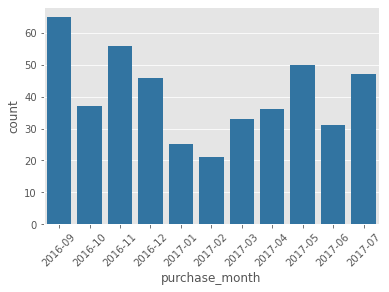

In [859]:
sns.countplot(data = month_1_revenue, x = 'purchase_month', color = 'tab:blue')
plt.xticks(rotation = 45)
plt.show()

- 16년 9월 구매 가장 많음
- 17년 2월 구매 가장 적음

In [802]:
print('총 구매 금액: $', round(sum(month_1_revenue['total_revenue']), 2))

총 구매 금액: $ 103167.28


In [803]:
# 1인 평균 구매 횟수. 이미 구매 완료된 집합이기 때문에 그룹바이하고 횟수 세준다
month_1_user = month_1_revenue.groupby('user_id')['total_revenue'].count().reset_index()
month_1_user

,user_id,total_revenue
0,0014262055593378383,3
1,0036417634769000138,1
2,009046037663524262,1
3,0134543573456503980,2
4,0147601968852145702,1
...,...,...
351,9891815404632176641,1
352,9952616174324085427,1
353,9963197880398595287,1
354,9970378027479686216,1


In [804]:
month_1_user.describe()

,total_revenue
count,356.00000
mean,1.25562
std,0.62740
min,1.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,7.00000


- 최소 1회, 최대 7회 구매
- 평균 약 1.3회 구매
- 구매자의 75%는 1회 이하 구매

### 첫 구매 달 +2

In [805]:
month_2 = purchase_completed[purchase_completed['passed_month'] == 2]

month_2

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
196362,2016-10-02,5427034488751812445,1475442321,purchase completed,(not set),Google Sunglasses,29.00000,29.00000,2016-10-01,2016-08-01,2
196662,2016-10-02,9377429831454005466,1475463443,purchase completed,(not set),Micro Wireless Earbud,40.19000,62.90000,2016-10-01,2016-08-01,2
196663,2016-10-02,9377429831454005466,1475463443,purchase completed,(not set),Galaxy Screen Cleaning Cloth,2.19000,62.90000,2016-10-01,2016-08-01,2
196664,2016-10-02,9377429831454005466,1475463443,purchase completed,(not set),Google Device Stand,5.19000,62.90000,2016-10-01,2016-08-01,2
196665,2016-10-02,9377429831454005466,1475463443,purchase completed,(not set),Compact Selfie Stick,9.19000,62.90000,2016-10-01,2016-08-01,2
...,...,...,...,...,...,...,...,...,...,...,...
798340,2017-07-29,4624790961997446284,1501363092,purchase completed,Apparel,Google Men's Vintage Badge Tee Black,10.26667,20.39000,2017-07-01,2017-05-01,2
798341,2017-07-29,4624790961997446284,1501363092,purchase completed,Office,Google Laptop and Cell Phone Stickers,5.05667,20.39000,2017-07-01,2017-05-01,2
798342,2017-07-29,4624790961997446284,1501363092,purchase completed,Office,Keyboard DOT Sticker,5.06667,20.39000,2017-07-01,2017-05-01,2
802304,2017-07-31,387849079599046538,1501513451,purchase completed,Apparel,Google Men's Quilted Insulated Vest Black,44.99000,61.58000,2017-07-01,2017-05-01,2


In [806]:
# 카테고리 확인

month_2['category'].value_counts()

Apparel                               398
Office                                189
Drinkware                              82
Electronics                            65
Lifestyle                              58
Bags                                   57
(not set)                              39
Headgear                               19
Notebooks & Journals                   14
Accessories                            10
Bottles                                 9
${productitem.product.origCatName}      7
Fun                                     5
Backpacks                               4
Housewares                              4
Waze                                    3
Google                                  2
Android                                 1
Name: category, dtype: int64

In [807]:
# 카테고리 not set과 알 수 없는 것은 삭제하고 본다.

month_2_cate = month_2.loc[month_2['category'] != '(not set)']
month_2_cate = month_2_cate.loc[month_2['category'] != '${productitem.product.origCatName}']
month_2_cate

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
222881,2016-10-13,8216610377778696054,1476400203,purchase completed,Drinkware,26 oz Double Wall Insulated Bottle,28.99000,28.99000,2016-10-01,2016-08-01,2
226463,2016-10-15,5682452231721622029,1476572472,purchase completed,Office,Rainbow Stylus Pen,22.00000,22.00000,2016-10-01,2016-08-01,2
235659,2016-10-19,7383823269227966775,1476900919,purchase completed,Apparel,Google Twill Cap,2023.70000,2023.70000,2016-10-01,2016-08-01,2
239675,2016-10-21,5922085116209926580,1477071197,purchase completed,Electronics,Google Bluetooth Headphones,44.99000,44.99000,2016-10-01,2016-08-01,2
245168,2016-10-24,3788077234501576551,1477344833,purchase completed,Apparel,Google Men's Performance 1/4 Zip Pullover Heat...,88.99000,88.99000,2016-10-01,2016-08-01,2
...,...,...,...,...,...,...,...,...,...,...,...
798340,2017-07-29,4624790961997446284,1501363092,purchase completed,Apparel,Google Men's Vintage Badge Tee Black,10.26667,20.39000,2017-07-01,2017-05-01,2
798341,2017-07-29,4624790961997446284,1501363092,purchase completed,Office,Google Laptop and Cell Phone Stickers,5.05667,20.39000,2017-07-01,2017-05-01,2
798342,2017-07-29,4624790961997446284,1501363092,purchase completed,Office,Keyboard DOT Sticker,5.06667,20.39000,2017-07-01,2017-05-01,2
802304,2017-07-31,387849079599046538,1501513451,purchase completed,Apparel,Google Men's Quilted Insulated Vest Black,44.99000,61.58000,2017-07-01,2017-05-01,2


In [808]:
month_2_cate['category'].value_counts()

Apparel                 398
Office                  189
Drinkware                82
Electronics              65
Lifestyle                58
Bags                     57
Headgear                 19
Notebooks & Journals     14
Accessories              10
Bottles                   9
Fun                       5
Housewares                4
Backpacks                 4
Waze                      3
Google                    2
Android                   1
Name: category, dtype: int64

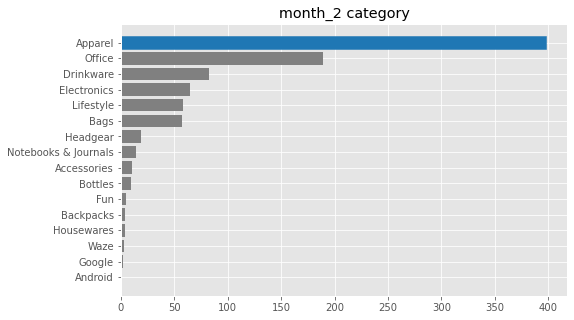

In [809]:
plt.figure(figsize = (8,5))

g01 = plt.barh(data = month_2_cate['category'].value_counts().reset_index().sort_values(by = ['category'], ascending = True), y = 'index', width = 'category', color = 'grey')
g01[15].set_color('tab:blue')
plt.title('month_2 category')
plt.show()

1. 구매 가장 많은 카테고리: Apparel
2. 상위 5개 카테고리: Apparel, Office, Drinkware, Electronics, Lifestyle

### revenue 중복 제거하고 구매 금액 계산하기

In [810]:
month_2_revenue = month_2_cate.drop_duplicates(['user_id', 'session_id', 'total_revenue'])

month_2_revenue

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
222881,2016-10-13,8216610377778696054,1476400203,purchase completed,Drinkware,26 oz Double Wall Insulated Bottle,28.99000,28.99000,2016-10-01,2016-08-01,2
226463,2016-10-15,5682452231721622029,1476572472,purchase completed,Office,Rainbow Stylus Pen,22.00000,22.00000,2016-10-01,2016-08-01,2
235659,2016-10-19,7383823269227966775,1476900919,purchase completed,Apparel,Google Twill Cap,2023.70000,2023.70000,2016-10-01,2016-08-01,2
239675,2016-10-21,5922085116209926580,1477071197,purchase completed,Electronics,Google Bluetooth Headphones,44.99000,44.99000,2016-10-01,2016-08-01,2
245168,2016-10-24,3788077234501576551,1477344833,purchase completed,Apparel,Google Men's Performance 1/4 Zip Pullover Heat...,88.99000,88.99000,2016-10-01,2016-08-01,2
...,...,...,...,...,...,...,...,...,...,...,...
780228,2017-07-22,157019484210987302,1500734220,purchase completed,Headgear,Google 5-Panel Snapback Cap,66.68529,307.41000,2017-07-01,2017-05-01,2
788875,2017-07-26,0640433429877929929,1501111326,purchase completed,Apparel,Android Men's Outerstellar Short Sleeve Tee Black,18.99000,37.18000,2017-07-01,2017-05-01,2
795426,2017-07-28,0097371986665596420,1501245017,purchase completed,Bags,Collapsible Shopping Bag,27.45000,49.20000,2017-07-01,2017-05-01,2
798340,2017-07-29,4624790961997446284,1501363092,purchase completed,Apparel,Google Men's Vintage Badge Tee Black,10.26667,20.39000,2017-07-01,2017-05-01,2


In [811]:
month_2_revenue.describe()

,session_id,item_revenue,total_revenue,passed_month
count,201.00000,201.00000,201.00000,201.00000
mean,1488040539.08458,179.58289,709.70313,2.00000
std,6983799.95714,687.01850,2750.49045,0.00000
min,1476400203.00000,3.03000,6.50000,2.00000
25%,1482162240.00000,19.95000,48.90000,2.00000
50%,1487016811.00000,44.99000,90.98000,2.00000
75%,1493156103.00000,88.99000,358.87000,2.00000
max,1501513451.00000,7496.00000,23952.56000,2.00000


1. 1회 구매 금액(revenue)
    - 최소 6.5달러, 최대 23952.56달러
    - 구매한 user의 75%는 약 359달러 이하로 구매
    - 1인 1회 구매 금액 평균 약 709달러

In [812]:
month_2_revenue['purchase_month'] = month_2_revenue['purchase_month'].dt.strftime('%Y-%m')
month_2_revenue

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_734/3552222094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_2_revenue['purchase_month'] = month_2_revenue['purchase_month'].dt.strftime('%Y-%m')


,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
222881,2016-10-13,8216610377778696054,1476400203,purchase completed,Drinkware,26 oz Double Wall Insulated Bottle,28.99000,28.99000,2016-10,2016-08-01,2
226463,2016-10-15,5682452231721622029,1476572472,purchase completed,Office,Rainbow Stylus Pen,22.00000,22.00000,2016-10,2016-08-01,2
235659,2016-10-19,7383823269227966775,1476900919,purchase completed,Apparel,Google Twill Cap,2023.70000,2023.70000,2016-10,2016-08-01,2
239675,2016-10-21,5922085116209926580,1477071197,purchase completed,Electronics,Google Bluetooth Headphones,44.99000,44.99000,2016-10,2016-08-01,2
245168,2016-10-24,3788077234501576551,1477344833,purchase completed,Apparel,Google Men's Performance 1/4 Zip Pullover Heat...,88.99000,88.99000,2016-10,2016-08-01,2
...,...,...,...,...,...,...,...,...,...,...,...
780228,2017-07-22,157019484210987302,1500734220,purchase completed,Headgear,Google 5-Panel Snapback Cap,66.68529,307.41000,2017-07,2017-05-01,2
788875,2017-07-26,0640433429877929929,1501111326,purchase completed,Apparel,Android Men's Outerstellar Short Sleeve Tee Black,18.99000,37.18000,2017-07,2017-05-01,2
795426,2017-07-28,0097371986665596420,1501245017,purchase completed,Bags,Collapsible Shopping Bag,27.45000,49.20000,2017-07,2017-05-01,2
798340,2017-07-29,4624790961997446284,1501363092,purchase completed,Apparel,Google Men's Vintage Badge Tee Black,10.26667,20.39000,2017-07,2017-05-01,2


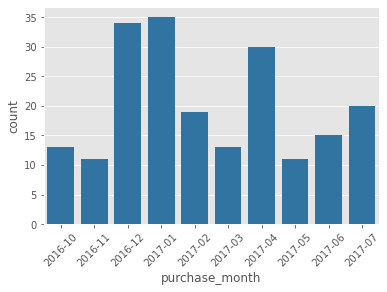

In [860]:
sns.countplot(data = month_2_revenue, x = 'purchase_month', color = 'tab:blue')
plt.xticks(rotation = 45)
plt.show()

- 17년 1월 구매 가장 많음
- 16년 11월, 17년 5월 구매 가장 적음

In [814]:
print('총 구매 금액: $', round(sum(month_2_revenue['total_revenue']), 2))

총 구매 금액: $ 142650.33


In [815]:
# 1인 평균 구매 횟수. 이미 구매 완료된 집합이기 때문에 그룹바이하고 횟수 세준다
month_2_user = month_2_revenue.groupby('user_id')['total_revenue'].count().reset_index()
month_2_user

,user_id,total_revenue
0,0097371986665596420,1
1,0134817585377058947,1
2,0175518117099857981,1
3,0197277329550470329,1
4,0220695720492664721,5
...,...,...
145,9541996968314639199,1
146,9620923631569343304,1
147,9771437221362506189,1
148,9791048489281287821,1


In [816]:
month_2_user.describe()

,total_revenue
count,150.00000
mean,1.34000
std,0.87339
min,1.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,8.00000


- 최소 1회, 최대 8회 구매
- 평균 약 1.3회 구매
- 구매자의 75%는 1회 이하 구매

### 첫 구매 달 +3

In [817]:
month_3 = purchase_completed[purchase_completed['passed_month'] == 3]

month_3

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
261193,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,13.84000,129.53000,2016-11-01,2016-08-01,3
261194,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Google Men's Zip Hoodie,45.04000,129.53000,2016-11-01,2016-08-01,3
261195,2016-11-01,9056455627173899052,1478038663,purchase completed,Electronics,Google Car Clip Phone Holder,5.84000,129.53000,2016-11-01,2016-08-01,3
261196,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,13.84000,129.53000,2016-11-01,2016-08-01,3
261197,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Android Men's Short Sleeve Tri-blend Hero Tee ...,15.44000,129.53000,2016-11-01,2016-08-01,3
...,...,...,...,...,...,...,...,...,...,...,...
751925,2017-07-12,2610708601231231422,1499902267,purchase completed,Office,Spiral Notebook and Pen Set,33.83333,79.05000,2017-07-01,2017-04-01,3
760990,2017-07-15,9890182105631590481,1500155697,purchase completed,Apparel,Google Twill Cap,9.29000,64.05000,2017-07-01,2017-04-01,3
760991,2017-07-15,9890182105631590481,1500155697,purchase completed,Headgear,Google Blackout Cap,11.13000,64.05000,2017-07-01,2017-04-01,3
760992,2017-07-15,9890182105631590481,1500155697,purchase completed,Office,Waterproof Gear Bag,32.50000,64.05000,2017-07-01,2017-04-01,3


In [818]:
# 카테고리 확인

month_3['category'].value_counts()

Apparel                               203
Office                                139
Drinkware                              68
Bags                                   40
Lifestyle                              36
Electronics                            26
Headgear                               11
${productitem.product.origCatName}      7
Bottles                                 6
Accessories                             4
Housewares                              4
More Bags                               3
Fun                                     3
Backpacks                               2
Tumblers                                1
Waze                                    1
Name: category, dtype: int64

In [819]:
# 카테고리 알 수 없는 것은 삭제하고 본다.

month_3_cate = month_3.loc[month_3['category'] != '${productitem.product.origCatName}']
month_3_cate

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
261193,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,13.84000,129.53000,2016-11-01,2016-08-01,3
261194,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Google Men's Zip Hoodie,45.04000,129.53000,2016-11-01,2016-08-01,3
261195,2016-11-01,9056455627173899052,1478038663,purchase completed,Electronics,Google Car Clip Phone Holder,5.84000,129.53000,2016-11-01,2016-08-01,3
261196,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,13.84000,129.53000,2016-11-01,2016-08-01,3
261197,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Android Men's Short Sleeve Tri-blend Hero Tee ...,15.44000,129.53000,2016-11-01,2016-08-01,3
...,...,...,...,...,...,...,...,...,...,...,...
751925,2017-07-12,2610708601231231422,1499902267,purchase completed,Office,Spiral Notebook and Pen Set,33.83333,79.05000,2017-07-01,2017-04-01,3
760990,2017-07-15,9890182105631590481,1500155697,purchase completed,Apparel,Google Twill Cap,9.29000,64.05000,2017-07-01,2017-04-01,3
760991,2017-07-15,9890182105631590481,1500155697,purchase completed,Headgear,Google Blackout Cap,11.13000,64.05000,2017-07-01,2017-04-01,3
760992,2017-07-15,9890182105631590481,1500155697,purchase completed,Office,Waterproof Gear Bag,32.50000,64.05000,2017-07-01,2017-04-01,3


In [820]:
month_3_cate['category'].value_counts()

Apparel        203
Office         139
Drinkware       68
Bags            40
Lifestyle       36
Electronics     26
Headgear        11
Bottles          6
Accessories      4
Housewares       4
More Bags        3
Fun              3
Backpacks        2
Tumblers         1
Waze             1
Name: category, dtype: int64

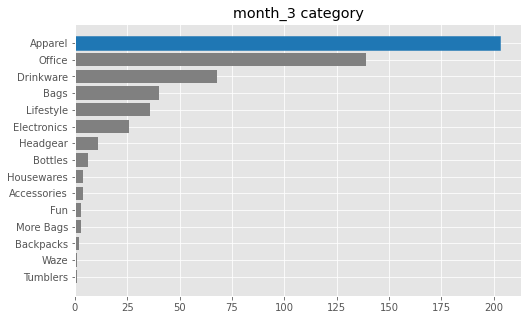

In [823]:
plt.figure(figsize = (8,5))

g01 = plt.barh(data = month_3_cate['category'].value_counts().reset_index().sort_values(by = ['category'], ascending = True), y = 'index', width = 'category', color = 'grey')
g01[14].set_color('tab:blue')
plt.title('month_3 category')
plt.show()

1. 구매 가장 많은 카테고리: Apparel
2. 상위 5개 카테고리: Apparel, Office, Drinkware, Bags, Lifestyle

### revenue 중복 제거하고 구매 금액 계산하기

In [824]:
month_3_revenue = month_3_cate.drop_duplicates(['user_id', 'session_id', 'total_revenue'])

month_3_revenue

,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
261193,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,13.84000,129.53000,2016-11-01,2016-08-01,3
262352,2016-11-02,5128888224452873031,1478108541,purchase completed,Apparel,YouTube Men's Short Sleeve Hero Tee Charcoal,31.38000,331.73000,2016-11-01,2016-08-01,3
262797,2016-11-02,7435052038545127483,1478131886,purchase completed,Drinkware,Google 17oz Stainless Steel Sport Bottle,293.11000,347.61000,2016-11-01,2016-08-01,3
264099,2016-11-03,9377429831454005466,1478200442,purchase completed,Apparel,Google Men's Short Sleeve Performance Badge Te...,22.99000,45.98000,2016-11-01,2016-08-01,3
266403,2016-11-04,8436426603099391262,1478265472,purchase completed,Drinkware,Android Glass Water Bottle with Black Sleeve,107.40000,182.80000,2016-11-01,2016-08-01,3
...,...,...,...,...,...,...,...,...,...,...,...
722096,2017-06-26,7445235885559107095,1498492122,purchase completed,Headgear,Google Blackout Cap,23.19000,23.19000,2017-06-01,2017-03-01,3
728854,2017-06-29,8443643406410739523,1498751790,purchase completed,Drinkware,Google 17oz Stainless Steel Sport Bottle,533.15000,643.41000,2017-06-01,2017-03-01,3
751105,2017-07-12,8133234491242505022,1499888231,purchase completed,Apparel,Google Men's Short Sleeve Hero Tee Charcoal,15.13000,33.22000,2017-07-01,2017-04-01,3
751923,2017-07-12,2610708601231231422,1499902267,purchase completed,Office,Rubber Grip Ballpoint Pen 4 Pack,28.23333,79.05000,2017-07-01,2017-04-01,3


In [825]:
month_3_revenue.describe()

,session_id,item_revenue,total_revenue,passed_month
count,120.00000,120.00000,120.00000,120.00000
mean,1488107524.90000,86.80546,307.54492,3.00000
std,6559427.76025,147.07700,404.32443,0.00000
min,1478038663.00000,3.08091,8.00000,3.00000
25%,1483369626.25000,20.72750,49.49500,3.00000
50%,1488061524.50000,44.53071,108.93000,3.00000
75%,1493939925.75000,89.15000,418.53500,3.00000
max,1500155697.00000,1250.33333,2131.64000,3.00000


1. 1회 구매 금액(revenue)
    - 최소 8달러, 최대 2131.64달러
    - 구매한 user의 75%는 약 419달러 이하로 구매
    - 1인 1회 구매 금액 평균 약 308달러

In [826]:
month_3_revenue['purchase_month'] = month_3_revenue['purchase_month'].dt.strftime('%Y-%m')
month_3_revenue

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_734/4082472853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_3_revenue['purchase_month'] = month_3_revenue['purchase_month'].dt.strftime('%Y-%m')


,date,user_id,session_id,action,category,name,item_revenue,total_revenue,purchase_month,start_month,passed_month
261193,2016-11-01,9056455627173899052,1478038663,purchase completed,Apparel,Google Men's 100% Cotton Short Sleeve Hero Tee...,13.84000,129.53000,2016-11,2016-08-01,3
262352,2016-11-02,5128888224452873031,1478108541,purchase completed,Apparel,YouTube Men's Short Sleeve Hero Tee Charcoal,31.38000,331.73000,2016-11,2016-08-01,3
262797,2016-11-02,7435052038545127483,1478131886,purchase completed,Drinkware,Google 17oz Stainless Steel Sport Bottle,293.11000,347.61000,2016-11,2016-08-01,3
264099,2016-11-03,9377429831454005466,1478200442,purchase completed,Apparel,Google Men's Short Sleeve Performance Badge Te...,22.99000,45.98000,2016-11,2016-08-01,3
266403,2016-11-04,8436426603099391262,1478265472,purchase completed,Drinkware,Android Glass Water Bottle with Black Sleeve,107.40000,182.80000,2016-11,2016-08-01,3
...,...,...,...,...,...,...,...,...,...,...,...
722096,2017-06-26,7445235885559107095,1498492122,purchase completed,Headgear,Google Blackout Cap,23.19000,23.19000,2017-06,2017-03-01,3
728854,2017-06-29,8443643406410739523,1498751790,purchase completed,Drinkware,Google 17oz Stainless Steel Sport Bottle,533.15000,643.41000,2017-06,2017-03-01,3
751105,2017-07-12,8133234491242505022,1499888231,purchase completed,Apparel,Google Men's Short Sleeve Hero Tee Charcoal,15.13000,33.22000,2017-07,2017-04-01,3
751923,2017-07-12,2610708601231231422,1499902267,purchase completed,Office,Rubber Grip Ballpoint Pen 4 Pack,28.23333,79.05000,2017-07,2017-04-01,3


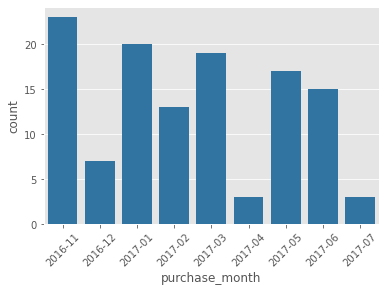

In [861]:
sns.countplot(data = month_3_revenue, x = 'purchase_month', color = 'tab:blue')
plt.xticks(rotation = 45)
plt.show()

- 16년 11월 구매 가장 많음
- 17년 4월, 17년 7월 구매 가장 적음

In [828]:
print('총 구매 금액: $', round(sum(month_3_revenue['total_revenue']), 2))

총 구매 금액: $ 36905.39


In [829]:
# 1인 평균 구매 횟수. 이미 구매 완료된 집합이기 때문에 그룹바이하고 횟수 세준다
month_3_user = month_3_revenue.groupby('user_id')['total_revenue'].count().reset_index()
month_3_user

,user_id,total_revenue
0,0101246539776970727,1
1,0214776722271775969,1
2,0220695720492664721,1
3,0533462479025888957,1
4,0594824422792523749,1
...,...,...
82,9725941383382274621,1
83,9771437221362506189,2
84,9807072102349488174,1
85,9890182105631590481,1


In [830]:
month_3_user.describe()

,total_revenue
count,87.00000
mean,1.37931
std,1.22229
min,1.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,11.00000


- 최소 1회, 최대 11회 구매
- 평균 약 1.4회 구매
- 구매자의 75%는 1회 이하 구매

In [831]:
time_purchase_count = pd.DataFrame()
time_purchase_count

""


In [832]:
time_purchase_count['month_0'] = month_0_user.describe()
time_purchase_count['month_1'] = month_1_user.describe()
time_purchase_count['month_2'] = month_2_user.describe()
time_purchase_count['month_3'] = month_3_user.describe()

time_purchase_count

,month_0,month_1,month_2,month_3
count,9961.00000,356.00000,150.00000,87.00000
mean,1.09527,1.25562,1.34000,1.37931
std,0.50525,0.62740,0.87339,1.22229
min,1.00000,1.00000,1.00000,1.00000
25%,1.00000,1.00000,1.00000,1.00000
50%,1.00000,1.00000,1.00000,1.00000
75%,1.00000,1.00000,1.00000,1.00000
max,17.00000,7.00000,8.00000,11.00000


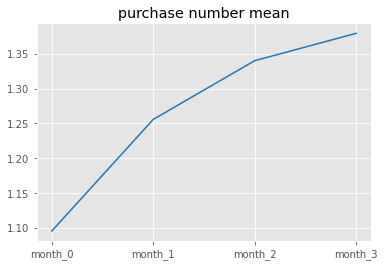

In [862]:
plt.plot(time_purchase_count.T['mean'], color = 'tab:blue')
plt.title('purchase number mean')
plt.show()

In [834]:
time_revenue = pd.DataFrame()
time_revenue

""


In [836]:
time_revenue['month_0'] = month_0_revenue.describe()['total_revenue']
time_revenue['month_1'] = month_1_revenue.describe()['total_revenue']
time_revenue['month_2'] = month_2_revenue.describe()['total_revenue']
time_revenue['month_3'] = month_3_revenue.describe()['total_revenue']

time_revenue

,month_0,month_1,month_2,month_3
count,10910.00000,447.00000,201.00000,120.00000
mean,128.26373,230.79928,709.70313,307.54492
std,403.40303,552.57273,2750.49045,404.32443
min,1.20000,4.99000,6.50000,8.00000
25%,29.15750,38.89000,48.90000,49.49500
50%,53.39000,77.97000,90.98000,108.93000
75%,108.94750,223.66000,358.87000,418.53500
max,17859.50000,8680.83000,23952.56000,2131.64000


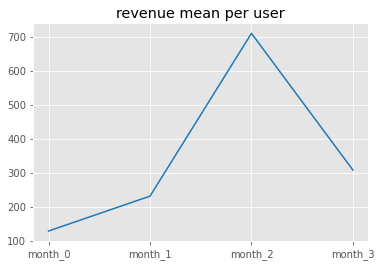

In [863]:
plt.plot(time_revenue.T['mean'], color = 'tab:blue')
plt.title('revenue mean per user')
plt.show()

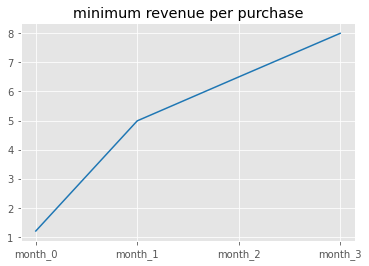

In [864]:
plt.plot(time_revenue.T['min'], color = 'tab:blue')
plt.title('minimum revenue per purchase')
plt.show()

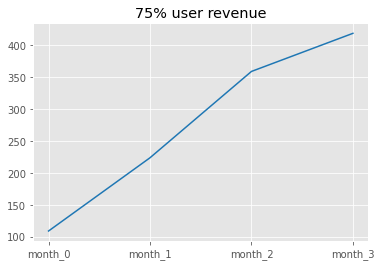

In [865]:
plt.plot(time_revenue.T['75%'], color = 'tab:blue')
plt.title('75% user revenue')
plt.show()